In [1]:
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv'
df = pd.read_csv(url, na_values='?').dropna()
df['horsepower2'] = df.horsepower**2
df['horsepower3'] = df.horsepower**3
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,horsepower3
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,16900,2197000
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,27225,4492125
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,22500,3375000
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,22500,3375000
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,19600,2744000


$$
f(x^{(i)})=\beta_0+\sum_{j=1}^p\beta_jx_j^{(i)}
$$
$$
$$
$$
{\bf X}=\left[\begin{array}{cccccc}
1&x^{(1)}_1&x^{(1)}_2&\cdots&x^{(1)}_p\\
1&x^{(2)}_1&x^{(2)}_2&\cdots&x^{(2)}_p\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x^{(N)}_1&x^{(N)}_2&\cdots&x^{(N)}_p\\
\end{array}\right]
$$
$$
$$
$$
\hat\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
$$
$$
$$
$$
\hat{\bf y}={\bf X}\hat\beta={\bf X}({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
$$
$$
$$
$$
\hat\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}\sim N(\beta,({\bf X}^T{\bf X})^{-1}\sigma^2)
$$
$$
$$
$$
\hat\sigma^2=\frac{1}{N-p-1}\sum_{i=1}^N(y^{(i)}-\hat y^{(i)})^2\sim \sigma^2\frac{\chi^2_{N-p-1}}{N-p-1}
$$
$$
$$
Under $H_0:\beta_j=0$
$$
t_j=\frac{\hat\beta_j}{\hat\sigma\sqrt{v_j}}\sim t_{N-p-1}
$$
where
$$
v_j=({\bf X}^T{\bf X})^{-1}_{jj}
$$

In [3]:
import statsmodels.formula.api as sm # conda install -c conda-forge statsmodels
result = sm.ols('mpg ~ horsepower', df).fit()
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145


In [4]:
result = sm.ols('mpg ~ horsepower + horsepower2', df).fit()
print(result.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001


In [5]:
result = sm.ols('mpg ~ horsepower + horsepower2 + horsepower3', df).fit()
print(result.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.6848      4.563     13.298      0.000      51.713      69.657
horsepower     -0.5689      0.118     -4.824      0.000      -0.801      -0.337
horsepower2     0.0021      0.001      2.193      0.029       0.000       0.004
horsepower3 -2.147e-06   2.38e-06     -0.903      0.367   -6.82e-06    2.53e-06


In [6]:
def train_test_split(df, test_size_ratio=0.3):
    num_data = df.shape[0]
    num_data_train = int(num_data * (1-test_size_ratio)) 
    xy_train = df.iloc[:num_data_train].values
    xy_test = df.iloc[num_data_train:].values
    x_train = xy_train[:,:-1].astype(np.float32)
    y_train = xy_train[:,-1].astype(np.float32).reshape((-1,1))
    x_test = xy_test[:,:-1].astype(np.float32)
    y_test = xy_test[:,-1].astype(np.float32).reshape((-1,1))
    return x_train, y_train, x_test, y_test

In [7]:
x_train, y_train, x_test, y_test = train_test_split(df[['horsepower','horsepower2','mpg']]) 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)

(274, 2) (274, 1) (118, 2) (118, 1)
float32 float32 float32 float32


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [9]:
print(model.intercept_)
print(model.coef_)

[48.993988]
[[-0.37836647  0.0009887 ]]


In [10]:
print(model.score(x_train, y_train)) # R^2
print(model.score(x_test, y_test)) # R^2

0.7317995425973349
-0.09933430339545346


$$
\begin{array}{lll}
\mbox{MAE}&&\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|\\
\mbox{MSE}&&\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2\\
\mbox{RMSE}&&\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{array}
$$

In [11]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

6.1080556
52.637016
7.2551374


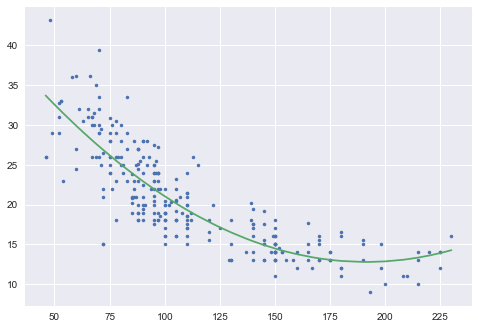

In [12]:
idx = np.argsort(x_train[:,0])
x_train_sort = x_train[idx,0]
y_train_sort = y_train[idx,0]
y_train_pred_sort = y_train_pred[idx]
plt.plot(x_train_sort.reshape((-1,)), y_train_sort.reshape((-1,)), '.')
plt.plot(x_train_sort.reshape((-1,)), y_train_pred_sort.reshape((-1,)));

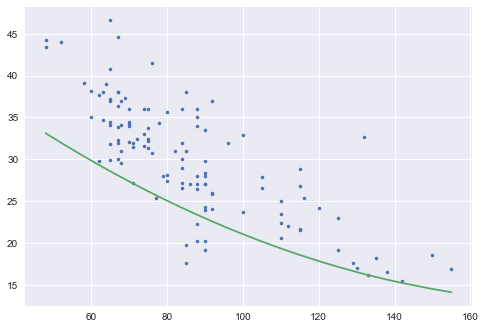

In [13]:
idx = np.argsort(x_test[:,0])
x_test_sort = x_test[idx,0]
y_test_sort = y_test[idx,0]
y_test_pred_sort = y_test_pred[idx]
plt.plot(x_test_sort.reshape((-1,)), y_test_sort.reshape((-1,)), '.')
plt.plot(x_test_sort.reshape((-1,)), y_test_pred_sort.reshape((-1,)));

# Reference

[Data_School](https://www.youtube.com/watch?v=3ZWuPVWq7p4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=6)

[JWarmenhoven](https://github.com/JWarmenhoven/ISLR-python)